In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_pickle('../../data/county_level/full_df.pkl')
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Drug overdose deaths - modeled CI high,Insufficient sleep raw value,Insufficient sleep CI low,Insufficient sleep CI high,Residential segregation - black/white raw value,Residential segregation - non-white/white raw value,County Code,Year,Deaths,Population
0,01,001,1001,AL,Autauga County,2010,1,9778.1,670,137881,...,NaN,NaN,NaN,NaN,NaN,NaN,1001,2010,12,54571
1,01,003,1003,AL,Baldwin County,2010,1,8221.7,2148,449589,...,NaN,NaN,NaN,NaN,NaN,NaN,1003,2010,31,182265
2,01,009,1009,AL,Blount County,2010,1,8929.7,787,155580,...,NaN,NaN,NaN,NaN,NaN,NaN,1009,2010,11,57322
3,01,015,1015,AL,Calhoun County,2010,1,11526.2,2035,313874,...,NaN,NaN,NaN,NaN,NaN,NaN,1015,2010,13,118572
4,01,031,1031,AL,Coffee County,2010,1,9004.7,645,126516,...,NaN,NaN,NaN,NaN,NaN,NaN,1031,2010,14,49948


In [40]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
independent_fields = ['Unemployment raw value', 'Income inequality raw value']
dependent_fields = ['Poor mental health days raw value', 'Deaths']
filtered_df = df[identifying_fields + independent_fields + dependent_fields]
filtered_df.head(n=20)

,State Abbreviation,Name,Release Year,Unemployment raw value,Income inequality raw value,Poor mental health days raw value,Deaths
0,AL,Autauga County,2010,0.046,40.7,4.14,12
1,AL,Baldwin County,2010,0.041,44.5,4.06,31
2,AL,Blount County,2010,0.041,41.1,4.47,11
3,AL,Calhoun County,2010,0.051,45.5,4.84,13
4,AL,Coffee County,2010,0.043,44.7,4.26,14
5,AL,Colbert County,2010,0.058,43.5,4.7,10
6,AL,Cullman County,2010,0.043,45.6,5.29,10
7,AL,Dale County,2010,0.048,41.4,3.73,10
8,AL,DeKalb County,2010,0.052,45.8,4.9,12
9,AL,Elmore County,2010,0.046,40.3,3.15,12


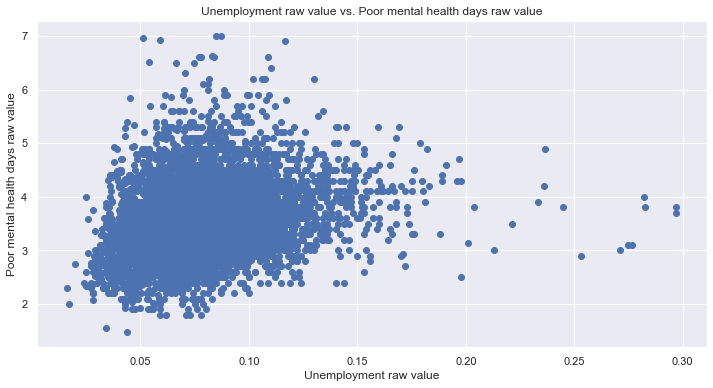

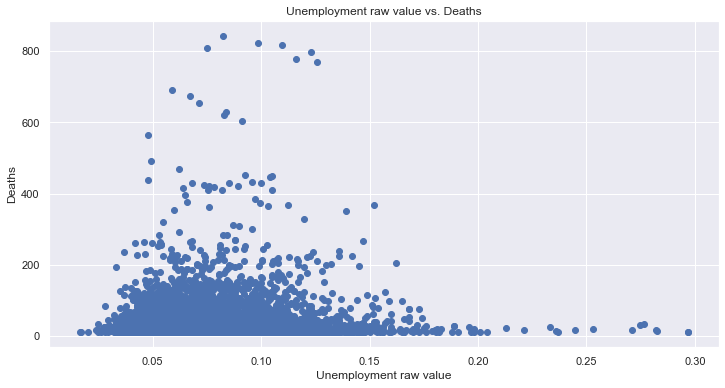

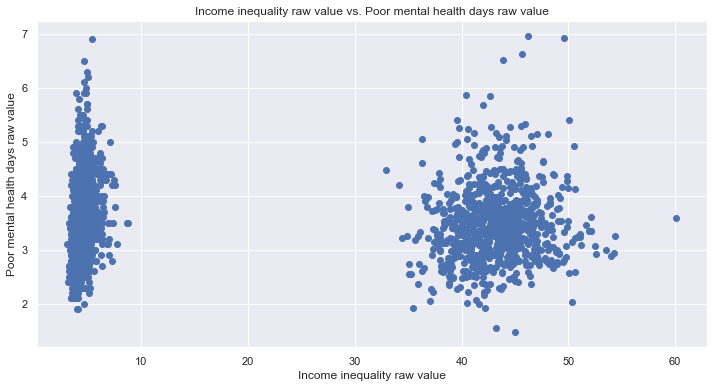

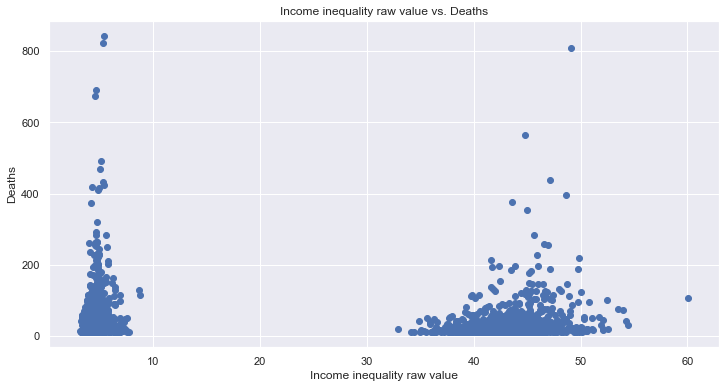

In [43]:
sns.set_theme()
for i, i_field in enumerate(independent_fields):
    for j, d_field in enumerate(dependent_fields):
        plt.figure(i * len(dependent_fields) + j, figsize=(12, 6))
        field_df = filtered_df[[i_field, d_field]].dropna()
        x = field_df[i_field].astype(float).to_numpy()
        y = field_df[d_field].astype(float).to_numpy()
        plt.scatter(x, y)
        plt.title('{} vs. {}'.format(i_field, d_field))
        plt.ylabel(d_field)
        plt.xlabel(i_field)
        plt.show()